# Homework set 6

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 12, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Christos Perchanidis    (14601206)

River Vaudrin           (11877154)

----------------

# Exercise 1 (4.5 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$.

Plot the observed and modeled data and make a separate plot of the residuals.

In [2]:
'''
THESE FUNCTIONS ARE FROM HEATH (EXAMPLE 6.15)!!!
I used this for testing purpouses ;)
'''
# def F(t,x1,x2):
#     return x1 * np.exp(x2*t)
# def Jacobian(t, x1, x2):
#     return np.array([-np.exp(x2*t), -x1*t*np.exp(x2*t)])
# # Data from same example
# y = [2.0,0.7,0.3,0.1]
# t = np.linspace(0,len(y)-1,len(y))


# Function: f(t,x1,x2) = x1 * x2**t
def F(t, x1, x2):
    return x1 * x2 ** t

# Jacobian of residual function
def Jacobian(t, x1, x2):
    return np.array([-x2**t, -t*x1*x2**(t-1)])

# Gauss-Newton Method to fit the function above^
def NLLS_GaussNewton(K, x0, t, y, p=False):
    # store initial guess as current solution
    x = x0
    # init list that stores norm residuals
    residuals_list = []
    # loop unitl max iterations reached
    for k in range(K):
        # compute predictions of y with current solution
        y_pred = F(t, x[0], x[1])

        # compute the residuals and store norm^2 to list
        residuals = y - y_pred
        residuals_list.append(np.linalg.norm(residuals)*np.linalg.norm(residuals))
    
        # compute the Jacobian of residual function
        jacobian = Jacobian(t, x[0], x[1])

        # solve Newton step
        s = np.linalg.lstsq(jacobian.T, -np.array([residuals]).T, rcond=None)[0] 
        
        # update the current solution
        x = x + s

        # print info per iteration if flag set to True
        if p:
            print("ITERATION: {}".format(k))
            print("* Jacobian: \n{}".format(jacobian))
            print("* Residuals: \n{}".format(residuals))
            print("* Current x: \n{}".format(x))
            print("-----------------")

    # return solution and list of residuals
    return x, residuals_list


y = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14] # Data
t = np.linspace(1,len(y),len(y)) # Time steps
K = 20 # Max iterations
x0 = np.array([[0],[1]]) # Initial Guess

x, residuals_list = NLLS_GaussNewton(K, x0, t, y, p=False)

print("After {} iterations our implementation produced P={} and r={} as the solution.\n".format(K, x[0], x[1]))
print("The norm(residuals)^2 for each iteration: \n{}".format(residuals_list))

After 20 iterations our implementation produced P=[0.16163835] and r=[1.74940289] as the solution.

The norm(residuals)^2 for each iteration: 
[298.9218, 168.9946, 15152.844899358899, 379.1164634712655, 298.92383540283015, 124171677.76533116, 10716.214857158764, 1011.8307324162957, 6.095134280614303, 120.16432285620103, 189.72021527691138, 4.821060997760021, 0.35205549990432206, 0.31774325650598617, 0.3177431280391851, 0.31774312792854653, 0.3177431279282091, 0.3177431279282086, 0.3177431279282087, 0.31774312792820736]


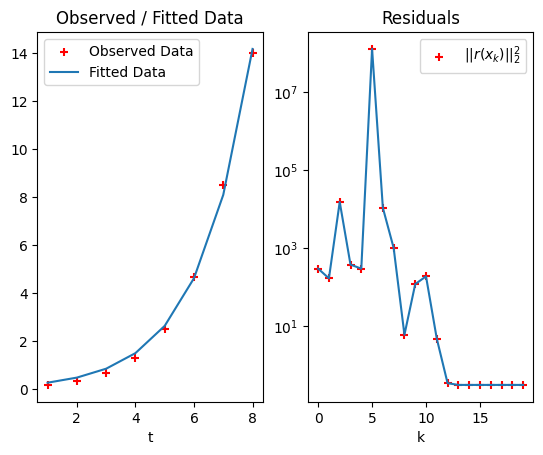

In [3]:
def plotFit(K, t, y, x, residuals_list):
    plt.subplot(1, 2, 1)
    plt.scatter(t, y, c="r", marker="+", label="Observed Data")
    plt.plot(t, F(t, x[0], x[1]), label="Fitted Data")
    plt.title("Observed / Fitted Data")
    plt.xlabel("t")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(np.linspace(0, K-1, K), residuals_list, c="r", marker="+", label="$||r(x_k)||^2_2$")
    plt.plot(np.linspace(0, K-1, K), residuals_list)
    plt.yscale("log")
    plt.title("Residuals")
    plt.xlabel("k")
    plt.legend()

    plt.show()

plotFit(K, t, y, x, residuals_list)

# (b) 
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( f_i(x) - y_i) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| F(x) - Y \|^2
$$
with $F(x) = T f(x)$  , $Y = T y$, where $T$ is the diagonal matrix with $\frac{1}{\sigma_i}$ on the diagonal. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0 = x_1$ and $r = x_2$.
Plot the observed and modeled data and make a separate plot of the residuals.

Are the results different from those of part (a)? Discuss and explain the differences.


In [4]:
# YOUR CODE HERE

Your answer here

----------------------
# Exercise 2 (4.5 points)



# (a) 
Let $f(x) = 1/x^2$ and $a=10^{-3}$ and $b=1$. Make a plot of the graph of $f$ on $[a,b]$. 

Text(0, 0.5, 'y')

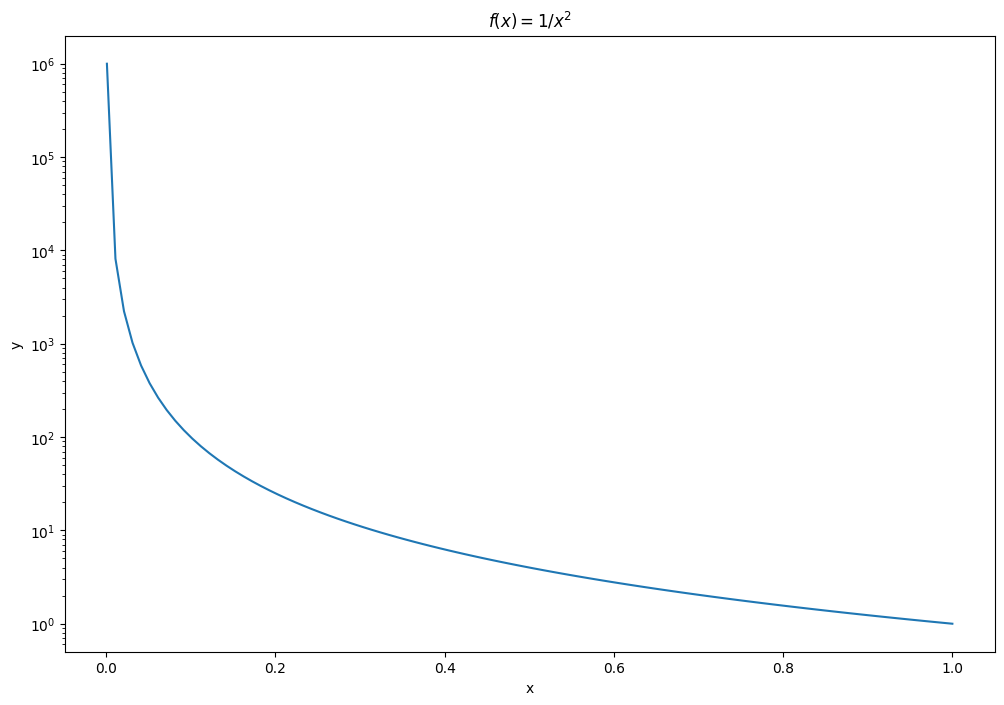

In [5]:
def f(x):
    return 1 / (x**2)

a = 10**-3
b = 1
res = 100

x = np.linspace(a, b, res)
y = []
for x_i in x:
    y.append(f(x_i))

plt.figure(figsize=(12, 8))
plt.semilogy(x, y)
plt.title("$f(x)=1/x^2$")
plt.xlabel("x")
plt.ylabel("y")

# (b) 
Use scipy.integrate.quad to compute $\int_a^b f(x) \, dx$ with an absolute error less than 1e-4. Compare with the true value of the integral.

In [6]:
result = integrate.quad(f, a, b, epsabs=10**-4)
print(result)

(999.0000000000118, 7.671666021402679e-05)


Analytical solution: (Should we place "+ C" at the end?) (Aren't the second and third steps the same?)

$$
\int\limits_{10^{-3}}^{1} \frac{1}{x^2}dx =
\int\limits_{10^{-3}}^{1} {x^{-2}}dx =
\int\limits_{10^{-3}}^{1} {x^{-2}}dx =
\frac{x^{-1}}{-1} \Big|_{10^{-3}}^{1} =
-\frac{1}{x} \Big|_{10^{-3}}^{1} =
-1 - \frac{1}{10^{-3}} = -1 - (-1000) = 999 + C
$$

# (c)
scipy.integrate.quad is an adaptive integration routine (book section 8.3.6), that automatically chooses an appropriate subdivision of the interval in subintervals. Therefore in some parts of the interval $[0,1]$ the function $f$ will be evaluated more often than in other parts. Divide the interval $[0,1]$ into bins $B_i = [h * (i-1), h*i]$, with $h=0.01$. For each bin $B_i$, count the number of times $f(x)$ is evaluated with $x$ in $B_i$. Make a histogram plot of these data. In which region is there a large number of function evaluations? Can you explain this, taking into account how $f$ is defined?

Hint: To know for which $x$ the function $f$ is evaluated, you can keep a global array `xVals` in which you store all values of $x$ for which the function $f$ is called. You can use a numpy array and use numpy.append to add new values to `xVals`.


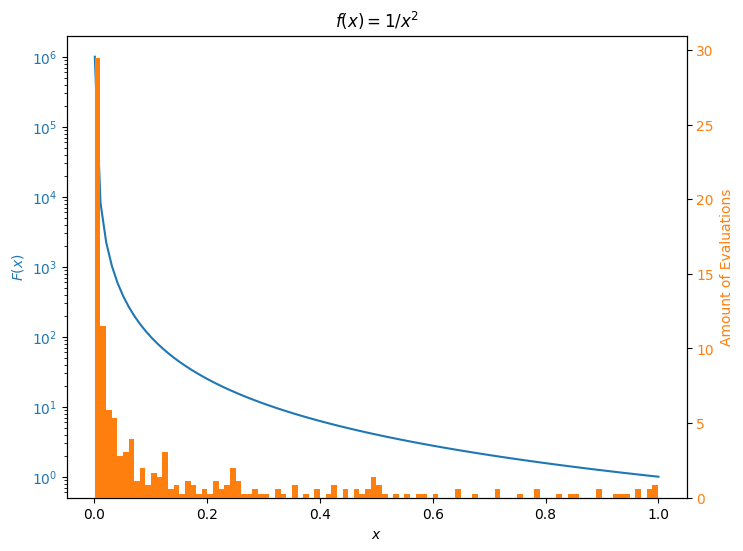

In [7]:
def viz_2_axis(x_axis, y_axis_1, y_axis_2, title):
    # Creating base figure
    fig, ax1 = plt.subplots(figsize=(8,6))
    ax1.set_xlabel('$x$')

    # Creating first Y Axis
    ax1.set_ylabel('$F(x)$', color="C0")
    ax1.semilogy(x_axis, y_axis_1, color="C0")
    ax1.tick_params(axis='y', labelcolor="C0")
    
    # Creating second Y Axis
    ax2 = ax1.twinx()
    ax2.set_ylabel('Amount of Evaluations', color="C1")
    ax2.hist(y_axis_2, density=True, bins=i, color="C1")
    ax2.tick_params(axis='y', labelcolor="C1")

    plt.title(title)
    plt.show()

def f(x):
    evals.append(x)
    return 1 / (x**2)

i = 100     # Amount of bins to evaluate
h = 0.01    # Bin's size
evals = []  # xVals

for i in range(1, i+1):
    integrate.quad(f, a, b, epsabs=10**-4)

viz_2_axis(x, y, evals, "$f(x)=1/x^2$")

As can be seen, amount of function evaluations follows the curvature of the function. Obviously, these spaces of the most critical value, as the area under them changes the fastest. Also, we can see how a bigger amount of calculations are around middle and the end of the interval. (More details will be added later)